# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# First I create an ImageSet class - just to encapsulate the data
import random

class ImageSet:
    def __init__(self, data, labels = None):
        if labels is None: # when reading from a file
            self.images = data['features']
            self.labels = data['labels']
        else:
            self.images = data
            self.labels = labels
        
    def length(self):
        return len(self.images)
    
    def img_shape(self):
        return self.images.shape[1:]

In [2]:
# Load pickled data
import pickle
        
signs_folder    = 'traffic-signs-data/'
training_file   = signs_folder + 'train.p'
validation_file = signs_folder + 'valid.p'
testing_file    = signs_folder + 'test.p'

with open(training_file, mode='rb') as f:
    train = ImageSet(pickle.load(f))
with open(validation_file, mode='rb') as f:
    valid = ImageSet(pickle.load(f))
with open(testing_file, mode='rb') as f:
    test  = ImageSet(pickle.load(f))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
import numpy as np

n_train = train.length()

n_valid = valid.length()

n_test  = test.length()

image_shape = train.img_shape()

n_classes = len(np.unique(train.labels))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Output 5 random image sets to visually check that the data loaded correctly
--------------------------

Speed limit (70km/h)  (1770 samples)


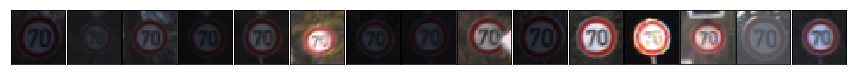

Road work  (1350 samples)


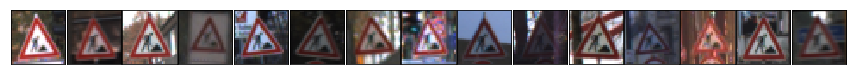

Keep right  (1860 samples)


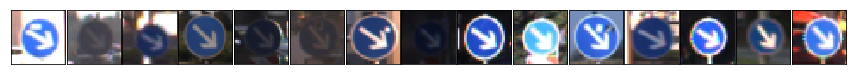

Beware of ice/snow  (390 samples)


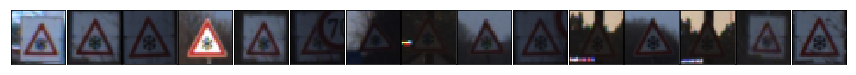

Go straight or left  (180 samples)


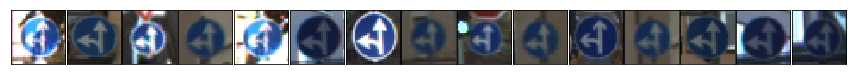

In [4]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline

def get_labels():
    labels = []
    with open('signnames.csv', newline='') as f:
        reader = csv.reader(f)
        for i, row in enumerate(reader):
            if (i != 0):
                labels.append(row)
    return labels

    
def plot_images(image_set, name, cmap=None):
    images = image_set.images
    labels = image_set.labels

    samples_per_label = np.bincount(labels)
    images_per_label = 15

    for label in random.sample(get_labels(), 5):
        label_index = int(label[0])
        label_name = label[1]
 
        print("{0}  ({1} samples)".format(label_name, samples_per_label[label_index]))

        sample_indices = np.where(labels == label_index)[0]

        random_samples = random.sample(list(sample_indices), images_per_label)
        fig = plt.figure(figsize = (images_per_label, 1))
        fig.subplots_adjust(hspace = 0, wspace = 0)
        for i in range(images_per_label):
            image = images[random_samples[i]]
            axis = fig.add_subplot(1, 15, i+1, xticks=[], yticks=[])

            if cmap == None: axis.imshow(image)
            else: axis.imshow(image.squeeze(), cmap=cmap)
        plt.savefig('plots/' + name + '.png', bbox_inches='tight')
        plt.show()


print('Output 5 random image sets to visually check that the data loaded correctly')
print('--------------------------\n')
plot_images(train, 'original_images')

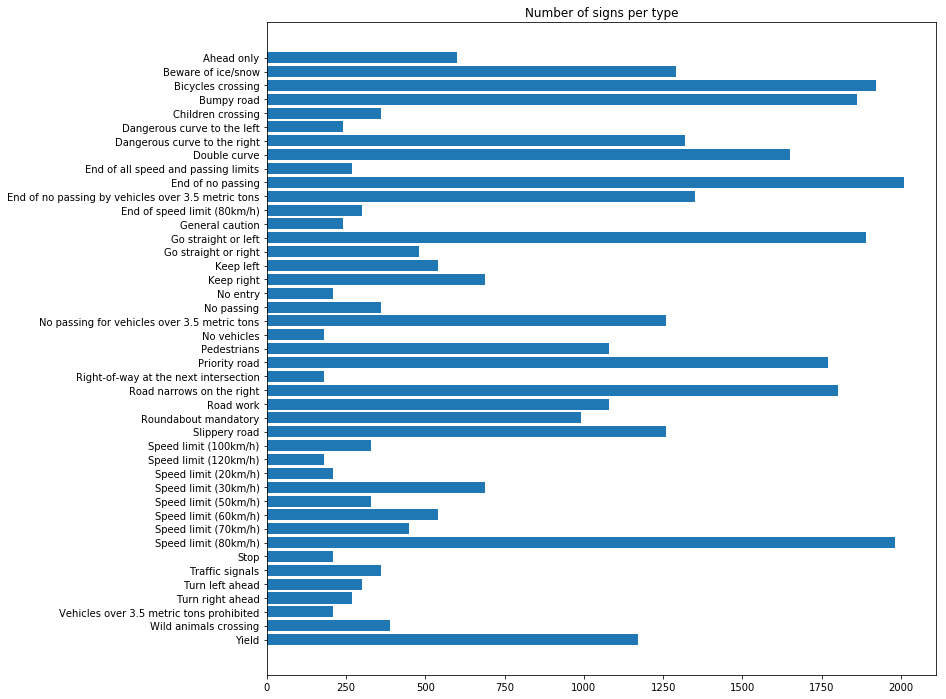

In [5]:
from itertools import groupby

def plot_signs_per_type():
    fig, ax = plt.subplots(figsize=(12, 12))

    labels = [label[1] for label in get_labels()]

    num_of_each = [len(list(group)) for key, group in groupby(train.labels)]

    ax.barh(labels, num_of_each)
    ax.set_yticks(labels)
    ax.set_yticklabels(labels)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_title('Number of signs per type')
    
    plt.savefig('plots/signs_per_type.png', bbox_inches='tight')

    plt.show()
    
plot_signs_per_type()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
def preprocess_img(img):
    def gray_scale(img):
        YCrCb = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
        return np.resize(YCrCb[:,:,0], (32,32,1))

    def normalize(img):
        a = -0.5
        b = 0.5
        minimum = 0
        maximum = 255
        return a + ((img - minimum) * (b - a)) / (maximum - minimum)

    return normalize(gray_scale(img))

### Add augmented data

For every image, add 2 to the dataset that are augmented

In [7]:
import cv2

def sharpen_img(img):
    gb = cv2.GaussianBlur(img, (5,5), 20.0)
    return cv2.addWeighted(img, 2, gb, -1, 0)


def rotate_img(img):
    c_x,c_y = int(img.shape[0]/2), int(img.shape[1]/2)
    ang = random.randint(-5, 5)
    Mat = cv2.getRotationMatrix2D((c_x, c_y), ang, 1.0)
    return cv2.warpAffine(img, Mat, img.shape[:2])


def scale_img(img):
    fx = random.randint(10, 13) * 0.1
    fy = random.randint(10, 13) * 0.1
    
    old_y, old_x, _ = img.shape

    img_resized = cv2.resize(img, None, fx=fx, fy=fy, interpolation = cv2.INTER_CUBIC)
    
    new_y, new_x, _ = img_resized.shape
    
    y_top = random.randint(0, new_y - old_y)
    y_bot = old_y + y_top

    x_left = random.randint(0, new_x - old_x)
    x_right = old_x + x_left
  
    img_cropped = img_resized[y_top:y_bot, x_left:x_right, : ]
    
    return img_cropped


def augment_img(img):
    return sharpen_img(rotate_img(scale_img(img)))


In [8]:
def preprocess_images(image_set, with_augment = True):
    augmented = []
    for img in image_set.images:
        augmented.append(preprocess_img(img))
        if with_augment:
            for i in range(2):
                augmented.append(preprocess_img(augment_img(img)))

    augmented, labels = shuffle(augmented, np.repeat(image_set.labels, 3) if with_augment else image_set.labels)

    return ImageSet(augmented, labels)

Output 5 random image sets to visually check that the images were processed correctly
--------------------------

No vehicles  (1620 samples)


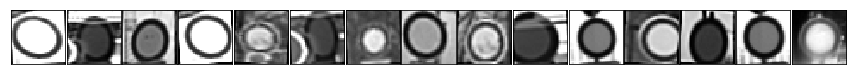

End of no passing  (630 samples)


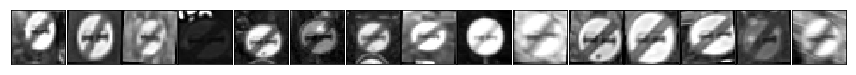

End of no passing by vehicles over 3.5 metric tons  (630 samples)


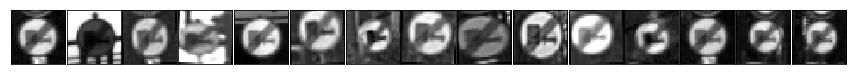

Speed limit (50km/h)  (6030 samples)


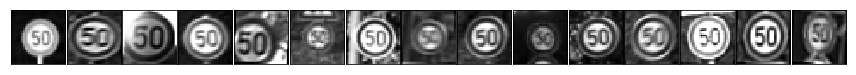

Turn left ahead  (1080 samples)


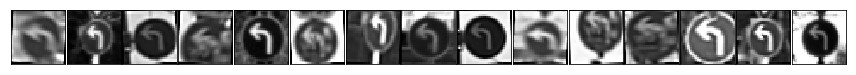

In [9]:
from sklearn.utils import shuffle

train_ext = preprocess_images(train)
valid_ext = preprocess_images(valid, False)
test_ext = preprocess_images(test, False)
assert(train_ext.length() == train.length() * 3)

print('Output 5 random image sets to visually check that the images were processed correctly')
print('--------------------------\n')
plot_images(train_ext, 'processed_images', cmap='gray')

### Model Architecture

In [99]:
# SETUP TENSORFLOW
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Architecture helpers
def get_dimension(feats):
    return feats.get_shape().as_list()[-1]


def conv2d(feats, weights, strides=1):
    return tf.nn.conv2d(feats, weights, strides=[1, strides, strides, 1], padding='VALID')
    

def layer(feats, combine, filters, out_depth, filter_size = None):
    weights = tf.Variable(get_weights(get_dimension(feats), out_depth, filter_size))
    biases = tf.Variable(tf.zeros(out_depth))
    conv = tf.nn.bias_add(combine(feats, weights), biases)
    for f in filters:
        conv = f(conv)
    return conv


# Convolutional Layer
def conv_layer(feats, filters, out_depth, filter_size):
    return layer(feats, conv2d, filters, out_depth, filter_size)


# Fully Connected Layer
def fc_layer(feats, filters, out_depth):
    return layer(feats, tf.matmul, filters, out_depth)


def relu(name):
    def func(feats):
        return tf.nn.relu(feats, name=name)
    return func


def dropout(feats):
    return tf.nn.dropout(feats, KEEP_PROB)


def max_pool(feats):
    return tf.nn.max_pool(feats, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')


def get_weights(in_depth, out_depth, filter_size = None):
    mu = 0
    sigma = 0.1

    shape = (in_depth, out_depth) if filter_size is None \
            else (filter_size[0], filter_size[1], in_depth, out_depth)

    return tf.truncated_normal(shape = shape, mean = mu, stddev = sigma)

In [100]:
# Architecture defined here
def LeNet(feats):    
    mu    = 0
    sigma = 0.1
    
    conv1 = conv_layer(feats, [relu('conv1'), max_pool], 32, (5, 5))

    conv2 = conv_layer(conv1, [relu('conv2'), max_pool, flatten, dropout], 64, (5, 5))

    fc1   = fc_layer(conv2, [relu('fc1'), dropout], 120)
 
    fc2   = fc_layer(fc1, [relu('fc2'), dropout], 84)

    fc3   = fc_layer(fc2, [], n_classes)
    
    return fc3

In [101]:
# Constants
EPOCHS = 2
BATCH_SIZE = 128 # 128
KEEP_PROB = 0.7

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [102]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

In [103]:
# Training Pipeline
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [104]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [105]:
errors = list()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(train_ext.images)
    
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(train_ext.images, train_ext.labels)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: KEEP_PROB})
            
        validation_accuracy = evaluate(valid_ext.images, valid_ext.labels)
        training_accuracy = evaluate(train_ext.images, train_ext.labels)
        
        errors.append(( training_accuracy, validation_accuracy))
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet.ckpt')
    print("Model saved")

Training...



KeyboardInterrupt: 

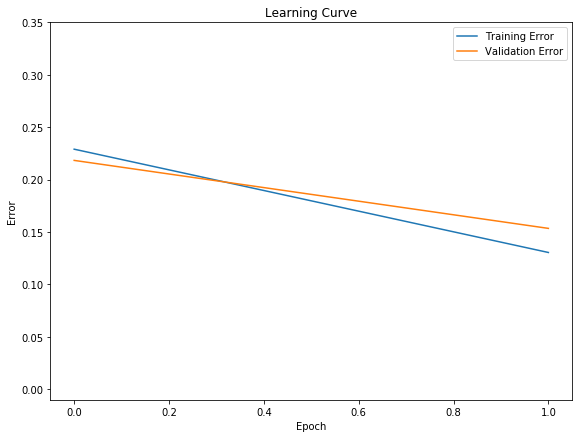

In [17]:
plt.figure(figsize=(8,6))
plt.title('Learning Curve')
plt.plot([1 - el[0] for el in errors])
plt.plot([1 - el[1] for el in errors])
plt.ylim([-.01,0.35])
plt.legend(['Training Error','Validation Error'])
plt.tight_layout()
plt.savefig('plots/learning_curve.png')
plt.ylabel('Error')
plt.xlabel('Epoch');

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

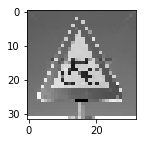

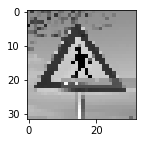

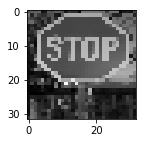

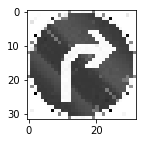

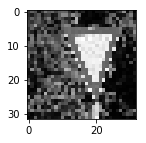

TypeError: Cannot interpret feed_dict key as Tensor: Can not convert a int into a Tensor.

In [76]:
import matplotlib.image as mpimg

test_images = ['bicycle.jpg', 'pedestrian.jpg', 'stop.jpg', 'turn-right.jpg', 'yield.jpg']
test_labels = [29, 27, 14, 33, 13]

prediction_operation = tf.argmax(logits, 1)

def predict(X_data):
    num_examples = len(X_data)
    predictions = []
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        prediction = sess.run(prediction_operation, feed_dict={x: batch_x, keep_prob: 1.0})
        predictions.append(prediction)
    predictions = np.concatenate(predictions)

    return predictions

def predict_name(img):
    img = np.expand_dims(img, axis=0)
    img = np.expand_dims(img, axis=3)
    pred = predict(img)
    return class_name[pred[0]]

def load_images():
    images = []
    for name in test_images:
        img = mpimg.imread('test-signs/' + name)
        resize_image = preprocess_img(cv2.resize(img, (32, 32)))
    
        plt.figure(figsize=(2,2))
        plt.imshow(resize_image.squeeze(), cmap='gray')
        plt.show()

        images.append(resize_image)
    return images

images = load_images()

all_labels = get_labels()

with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, "./lenet.ckpt")
    predicted_logits = sess.run(logits, feed_dict={x: images, keep_prob: 1.0})
    # print(predicted_logits)
    predicted_labels = np.argmax(predicted_logits, axis=1)
    # print(predicted_logits[0][predicted_labels[0]])
    # print(predicted_labels)

    for i in range(len(images)):
        print("{0} - Prediction: {1}".format(test_images[i], all_labels[predicted_labels[i]][1]))


# print("Loading model...")
# with tf.Session() as sess:
#     saver = tf.train.Saver()
#    saver.restore(sess, "./lenet.ckpt")
#    print("Model loaded.")
#    for img in images:
#        plt.figure(figsize=(2,2))
#        plt.imshow(img.squeeze(), cmap='gray')
#        plt.show()
#       predictedName = predict_name(img)
#        print(predictedName)



In [60]:
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, "./lenet.ckpt")
    test_accuracy = evaluate(images, test_labels)
    print("Test Accuracy = {:.0f}%".format(test_accuracy*100))

Test Accuracy = 60%


### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [68]:
with tf.Session() as sess:
    softmax = tf.nn.softmax(predicted_logits)
    top5 = sess.run(tf.nn.top_k(softmax, k=5))
    for x in range(len(test_images)):
        print("{0}:".format(test_images[x]))
        for y in range(5):
            print("{:s}: {:.2f}%".format(all_labels[top5[1][x][y]][1], top5[0][x][y]*100))
        print()

bicycle.jpg:
Slippery road: 34.15%
Bicycles crossing: 14.17%
Road work: 10.51%
Dangerous curve to the left: 7.00%
Children crossing: 6.56%

pedestrian.jpg:
Children crossing: 50.84%
General caution: 38.66%
Road narrows on the right: 4.02%
Pedestrians: 3.00%
Bicycles crossing: 1.01%

stop.jpg:
No entry: 30.53%
Speed limit (120km/h): 11.56%
Stop: 10.55%
Speed limit (100km/h): 8.01%
End of speed limit (80km/h): 7.38%

turn-right.jpg:
Turn right ahead: 89.39%
Keep left: 10.55%
Yield: 0.02%
Go straight or left: 0.01%
Right-of-way at the next intersection: 0.01%

yield.jpg:
Yield: 60.00%
No vehicles: 25.18%
No passing for vehicles over 3.5 metric tons: 7.45%
No passing: 3.35%
Priority road: 0.93%



### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [69]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [98]:
# with tf.Session() as sess:
#     saver = tf.train.Saver()
#     saver.restore(sess, "./lenet.ckpt")
#     conv1 = sess.graph.get_tensor_by_name('conv1:0')
#     outputFeatureMap(X_web, conv1)
#     #plt.savefig('05-conv1.png')

def myOutputFeatureMap(img):
    print(activation_func)
    img = np.expand_dims(img, axis=0)
    print(img)
    print(activation_func)
    outputFeatureMap(img, activation_func)

print("Loading model...")
with tf.Session() as sess:
    saver = tf.train.Saver()
    saver.restore(sess, "./lenet.ckpt")
    print("Model loaded.")

    print()
    plt.figure(figsize=(2,2))
    plt.imshow(np.squeeze(train_ext.images[0], axis=2), cmap='gray', vmin=-1, vmax=1)
    plt.show()
    myOutputFeatureMap(train_ext.images[0])

Loading model...


NotFoundError: Key beta2_power_2 not found in checkpoint
	 [[Node: save_59/RestoreV2_95 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_59/Const_0, save_59/RestoreV2_95/tensor_names, save_59/RestoreV2_95/shape_and_slices)]]

Caused by op 'save_59/RestoreV2_95', defined at:
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-98-237b8371086d>", line 17, in <module>
    saver = tf.train.Saver()
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1000, in __init__
    self.build()
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1030, in build
    restore_sequentially=self._restore_sequentially)
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 624, in build
    restore_sequentially, reshape)
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 361, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 200, in restore_op
    [spec.tensor.dtype])[0])
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/gen_io_ops.py", line 441, in restore_v2
    dtypes=dtypes, name=name)
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/cj/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

NotFoundError (see above for traceback): Key beta2_power_2 not found in checkpoint
	 [[Node: save_59/RestoreV2_95 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_59/Const_0, save_59/RestoreV2_95/tensor_names, save_59/RestoreV2_95/shape_and_slices)]]
